<figure>
<center>
<img src="http://www.emutechnology.com/wp-content/uploads/2018/08/Random-Forest.png" width='500px'/>
</figure>




## Poda da árvore



As árvores de decisão são construídas recursivamente até esgotar a base de dados ou só conter uma única classe. No entanto, geramos o problema do overfitting em relação ao conjunto de treinamento.

Observe o conjunto abaixo, cada imagem foi gerada com subconjunto diferente do mesmo dataset. Dependendo de como o conjunto está dividido, iremos produzir diferentes splits em cada nível da árvore.

![](https://github.com/dbguilherme/machinelearning/blob/main/pictures/05.08-decision-tree-overfitting.png?raw=true)




https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

Exemplo do problema do overfiting. No codigo abaixo é alterado o valor da altura máxima da árvore de [1,40] para se avaliar sua acurácia.



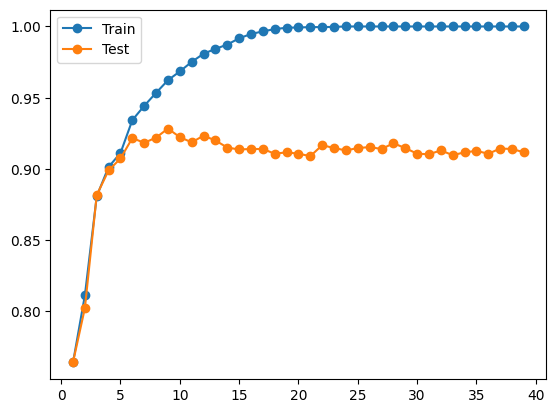

In [ ]:
#from https://machinelearningmastery.com/overfitting-machine-learning-models/
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 40)]
for i in values:

	model = DecisionTreeClassifier(max_depth=i)
	model.fit(X_train, y_train)


	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)

	#print(f'{i}, train: {train_acc:.3f}, test: {train_acc:.3f}')
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()

pyplot.show()


## Random Forests

![](https://www.researchgate.net/profile/Evaldas_Vaiciukynas/publication/301638643/figure/fig1/AS:355471899807744@1461762513154/Architecture-of-the-random-forest-model.png)



Objetivo é reduzir a variabilidade das árvores (overfitting) gerando dezenas de classificadores para o mesmo dataset.

IDEIA: quanto mais pessoas perguntarmos sobre um assunto maior a chance de obtermos uma resposta certa de acordo com a maioria das respostas.

Alguns passos:

1.   Selecionar amostras aleatóriamente;
2.   Construir a DT para cada amostra e obter a predição;
3.   Computar os votos para o resultado;
4.   Selecionar a resposta com mais votos;




![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)

From: res.cloudinary.com





In [ ]:
#@title Load Bib
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics


In [ ]:
#@title Load Dataset
url = 'https://raw.githubusercontent.com/dbguilherme/machinelearning/main/aug_train.csv'
df_train= pd.read_csv(url,encoding = "ISO-8859-1")


def preprocessing(df):
    df.drop(["enrollee_id"], axis=1, inplace=True)

    df.dropna(inplace=True)

    le = LabelEncoder()
    cols_to_le = ["gender","city","relevent_experience","enrolled_university","education_level","major_discipline","experience",
                  "company_size","company_type","last_new_job"]
    for col in cols_to_le:
        df[col] = le.fit_transform(df[col])
    return df
df_train_proc=preprocessing(df_train)

In [ ]:
#apagar o rotulo
X = df_train_proc.drop("target", axis=1)
#cria um dataframe para o rotulo
y = df_train_proc["target"]

#divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.3)

In [ ]:
#Importar a biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

#Criar o classificador com 100 árvores
clf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2)

#cria o modelo
clf.fit(X_train, y_train)

#faz a predição
y_pred = clf.predict(X_test)

#reportando as métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      2231
         1.0       0.57      0.34      0.43       456

    accuracy                           0.84      2687
   macro avg       0.72      0.65      0.67      2687
weighted avg       0.82      0.84      0.83      2687



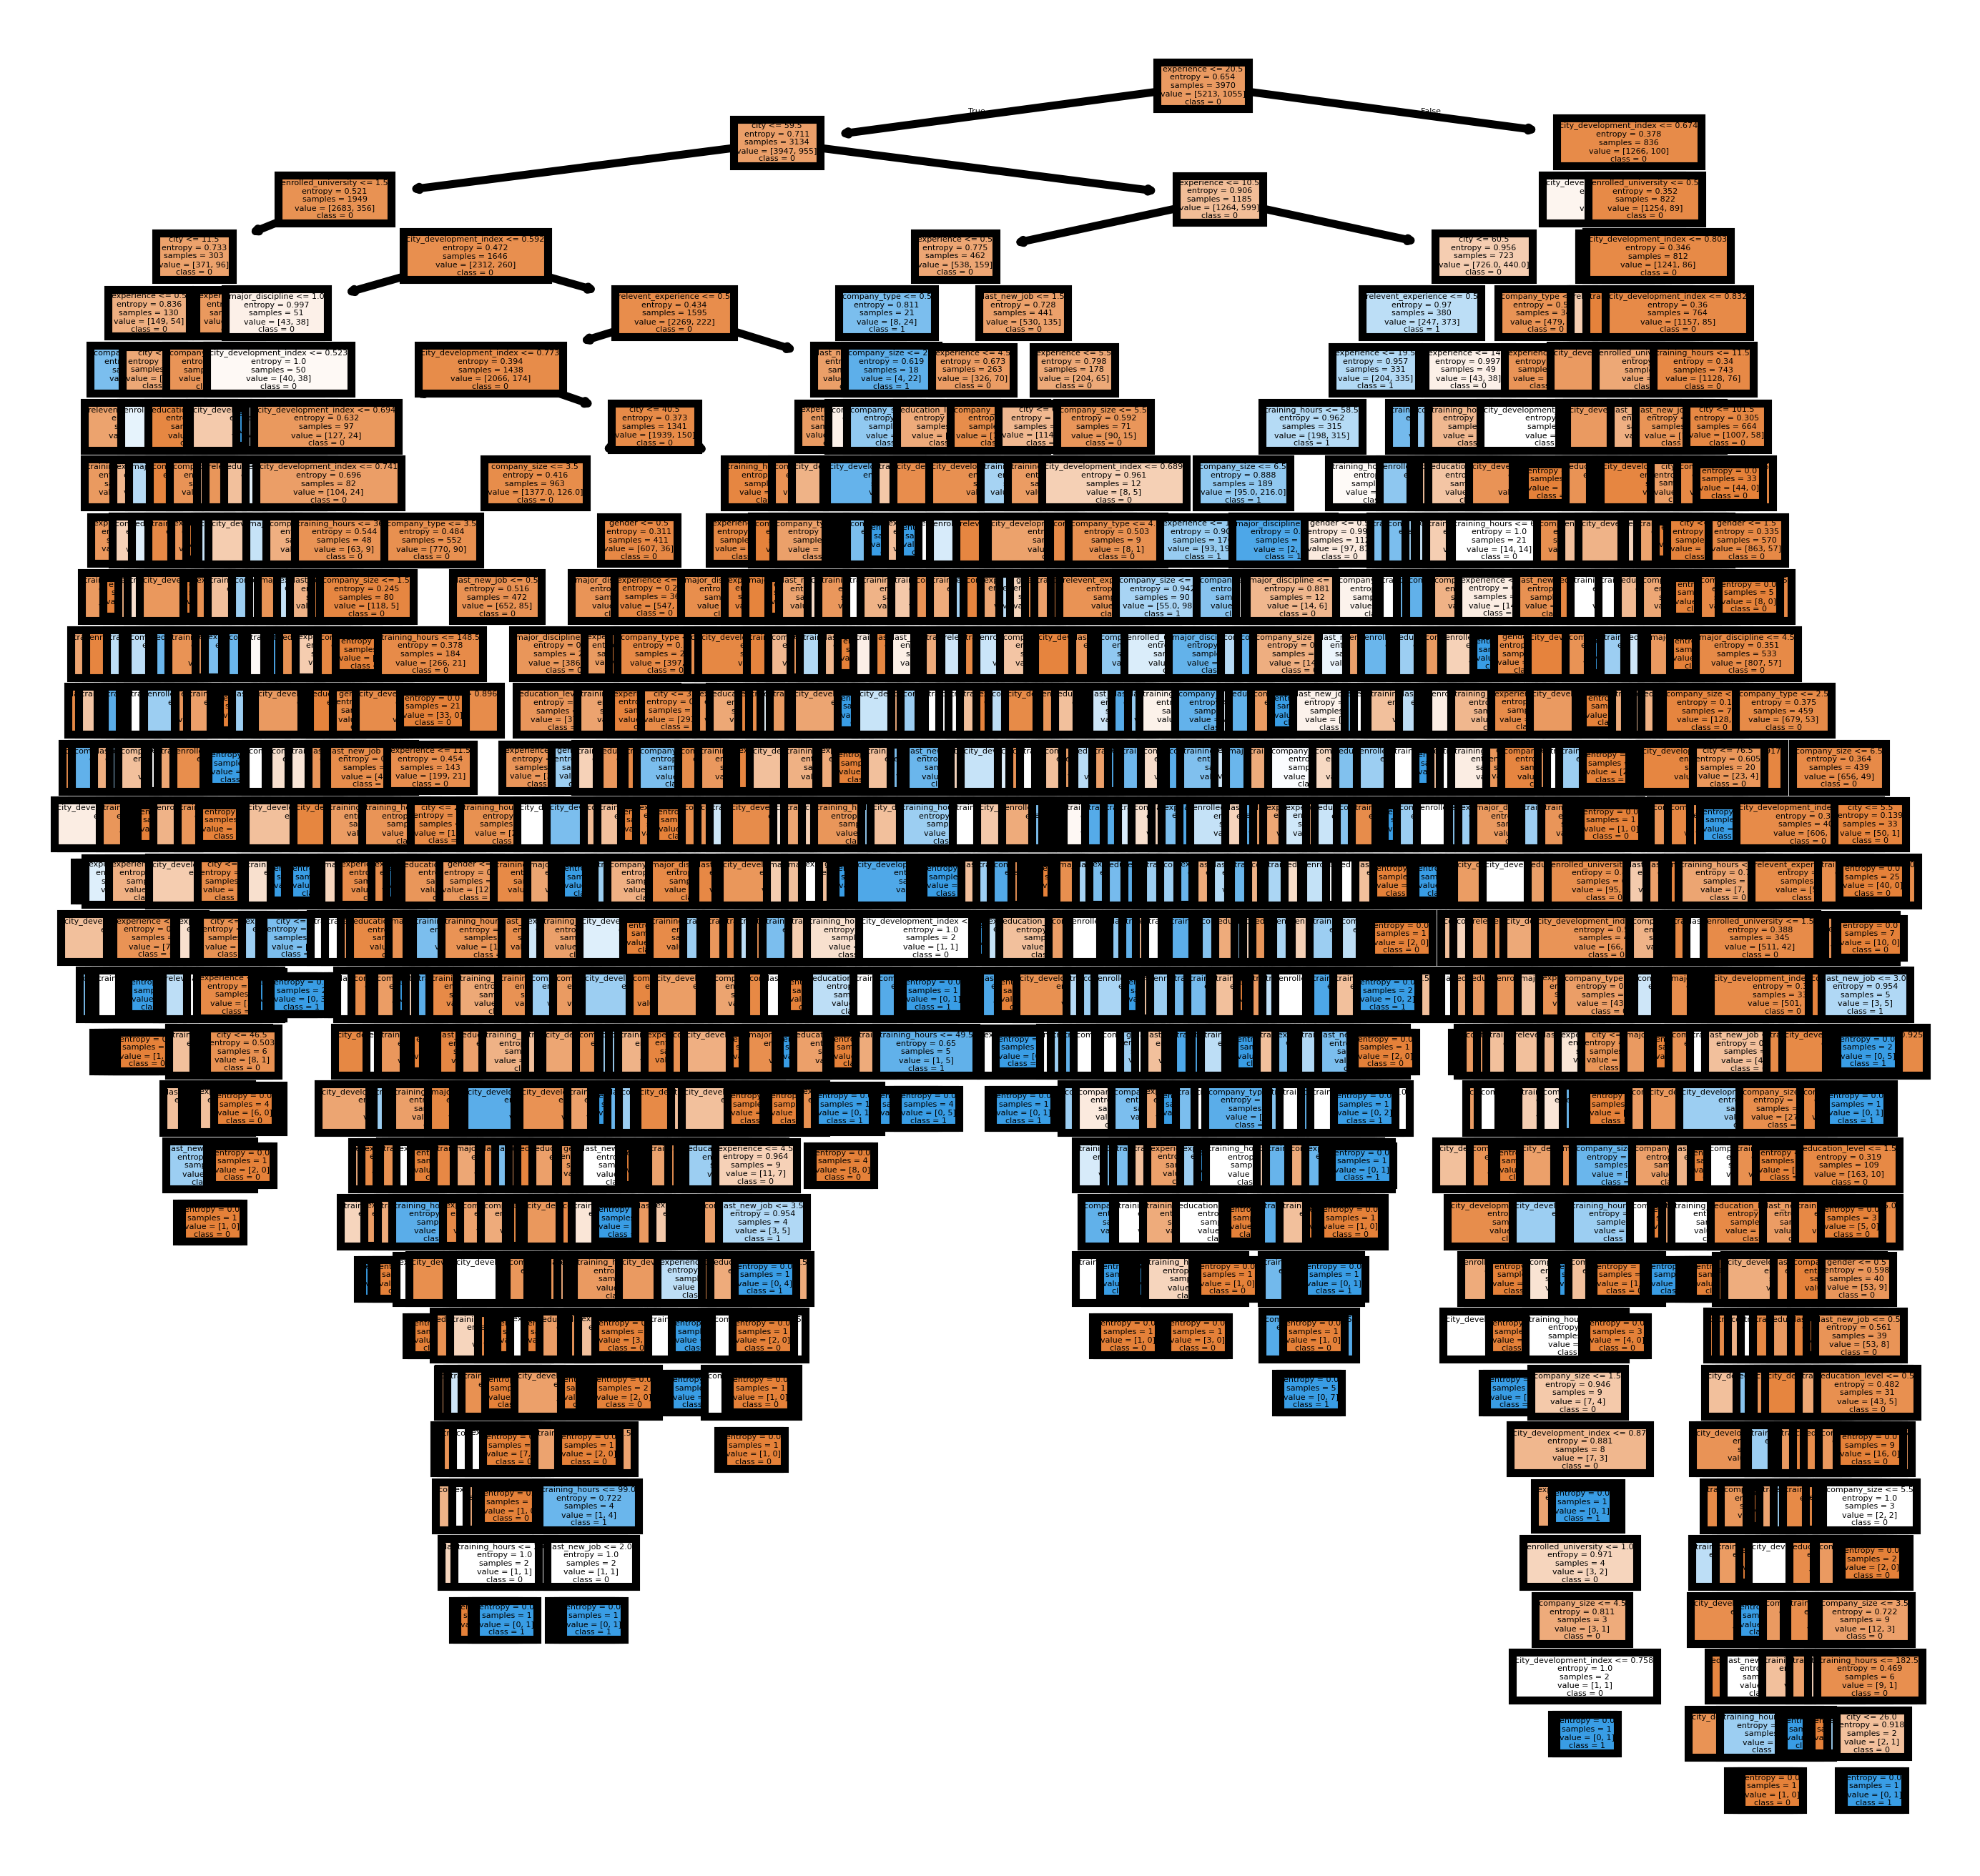

In [ ]:
# Access the first tree in the forest
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plt.figure(figsize=(16, 8))
fn=df_train_proc.columns

cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.show()
#fig.savefig('rf_individualtree.png')

In [ ]:
#Importar a biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#Criar o classificador com 100 árvores
clf=DecisionTreeClassifier(criterion='entropy',random_state=2)

#cria o modelo
clf.fit(X_train, y_train)

#faz a predição
y_pred = clf.predict(X_test)

#reportando as métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2231
         1.0       0.33      0.36      0.35       456

    accuracy                           0.77      2687
   macro avg       0.60      0.61      0.60      2687
weighted avg       0.78      0.77      0.77      2687



###Vantagens:



*   Produz uma melhor precisão devido a grande quantidade de árvores;
*   Evita o problema do overfiting;




### Limitações:
*   Uso de recursos de mémoria/cpu para geração das árvores.
*   Resultados difíceis de interpretar;
*   Aplicação principal em dados complexos (muitas features)



#Atividade

1- No exemplo anterior, as randomForest são mais precisas ou recuperam mais elementos que as árvores de decisão?  

2- Aumente o número de árvores para 50,100 e 500. Qual é o F1?

3- Utilize o dataset envolvendo discurso de ódio para aplicar método RandomForest e compare o F1 com os métodos anteriores (Rodar com o Decision Tree e Naive Bayes ).



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dbguilherme/machinelearning/main/dataset/hate_speech.csv',delimiter=";")



df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,class,tweet
0,NaN,NaN,NaN,NaN,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,NaN,NaN,NaN,NaN,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,NaN,NaN,NaN,NaN,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,NaN,NaN,NaN,NaN,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,NaN,NaN,NaN,NaN,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
#Conta a frequência de cada palavra e faz a substituição
vectorizer = CountVectorizer()
dataset = vectorizer.fit_transform(df['tweet'])

RandomForestClassifier(criterion='entropy', random_state=2)
              precision    recall  f1-score   support

           0       0.49      0.07      0.13       430
           1       0.86      0.98      0.92      5749
           2       0.90      0.59      0.71      1256

    accuracy                           0.86      7435
   macro avg       0.75      0.55      0.59      7435
weighted avg       0.85      0.86      0.84      7435

